# Import necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import tensorflow as tf
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import normalize, to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from sklearn.metrics import confusion_matrix , classification_report,ConfusionMatrixDisplay
from tensorflow.keras import models,layers

**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load Data

In [4]:
image_dir='/content/drive/MyDrive/Data set/archive (1)'
no_tumor_images=os.listdir(image_dir+ '/no')
yes_tumor_images=os.listdir(image_dir+ '/yes')
print('The length of no tumor images is',len(no_tumor_images))
print('The length of yes tumor images is',len(yes_tumor_images))

The length of no tumor images is 1500
The length of yes tumor images is 1500


In [5]:
#creat an empty list for dataset and label
dataset=[]
label=[]


In [ ]:
no_tumor_images

In [6]:
import os

# Loop for reading no tumor images
for i, image_name in enumerate(no_tumor_images):
    if image_name.endswith('.jpg'):
        image_path = os.path.join(image_dir, 'no', image_name)

        # Check if the image file exists
        if os.path.exists(image_path):
            image = cv2.imread(image_path)

            # Check if the image was successfully loaded
            if image is not None:
                # Convert images to RGB format
                image = Image.fromarray(image, 'RGB')
                image = image.resize((128, 128))

                # Append images as numpy array to dataset list
                dataset.append(np.array(image))

                # Append 0 label to the label list (label for no tumor)
                label.append(0)
            else:
                print(f"Failed to read image: {image_path}")
        else:
            print(f"Image not found: {image_path}")

# Continue with the rest of your code...


In [8]:
import os

# Loop for reading yes tumor images
for i, image_name in enumerate(yes_tumor_images):
    if image_name.endswith('.jpg'):
        image_path = os.path.join(image_dir, 'yes', image_name)

        # Check if the image file exists
        if os.path.exists(image_path):
            image = cv2.imread(image_path)

            # Check if the image was successfully loaded
            if image is not None:
                # Convert images to RGB format
                image = Image.fromarray(image, 'RGB')
                image = image.resize((128, 128))

                # Append images as numpy array to dataset list
                dataset.append(np.array(image))

                # Append 1 label to the label list (label for yes tumor)
                label.append(1)
            else:
                print(f"Failed to read image: {image_path}")
        else:
            print(f"Image not found: {image_path}")

# Continue with the rest of your code...


In [9]:
#convert list to numpy array
dataset=np.array(dataset)
label = np.array(label)

print('Dataset: ',len(dataset))
print('Label: ',len(label))

Dataset:  3000
Label:  3000


# Train Test-Split

In [10]:
x_train,x_test,y_train,y_test=train_test_split(dataset,label,test_size=.2)

# Normalise the Data

In [11]:
x_train=normalize(x_train,axis=1)
x_test=normalize(x_test,axis=1)

# Building CNN Model

In [12]:
cnn=models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(128,128,3)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dropout(.5),
    layers.Dense(1,activation='sigmoid')
])
cnn.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy'])

# Model Fit

In [13]:
cnn.fit(x_train,y_train,epochs=5)

Epoch 1/5
75/75 [==============================] - 39s 494ms/step - loss: 0.5473 - accuracy: 0.7504
Epoch 2/5
75/75 [==============================] - 38s 501ms/step - loss: 0.2577 - accuracy: 0.9033
Epoch 3/5
75/75 [==============================] - 40s 535ms/step - loss: 0.1266 - accuracy: 0.9613
Epoch 4/5
75/75 [==============================] - 43s 558ms/step - loss: 0.0861 - accuracy: 0.9771
Epoch 5/5
75/75 [==============================] - 40s 536ms/step - loss: 0.0426 - accuracy: 0.9912


# Model Evaluate

In [14]:
cnn.evaluate(x_test,y_test)

19/19 [==============================] - 5s 251ms/step - loss: 0.0695 - accuracy: 0.9733


[0.06954832375049591, 0.9733333587646484]

In [15]:
y_pred=cnn.predict(x_test)
y_pred = cnn.predict(x_test)
y_pred = (y_pred > 0.5).astype(int)
print('classification Report\n',classification_report(y_test,y_pred))

19/19 [==============================] - 3s 138ms/step
classification Report
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       291
           1       0.97      0.98      0.97       309

    accuracy                           0.97       600
   macro avg       0.97      0.97      0.97       600
weighted avg       0.97      0.97      0.97       600



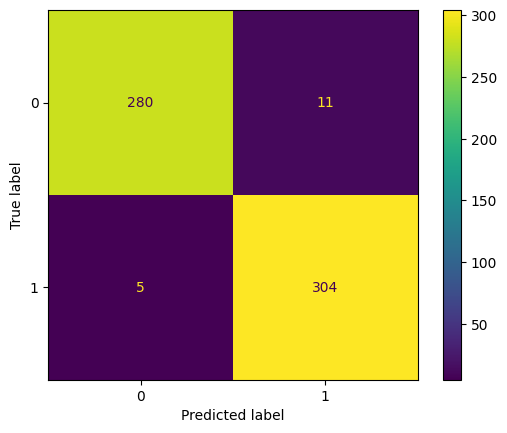

In [16]:
cm = confusion_matrix(y_test, y_pred)
display=ConfusionMatrixDisplay(cm)
display.plot()
plt.show()

# Save Model

In [17]:
cnn.save('brain tumor detection.h5')

# Load Model

In [21]:
model = load_model('brain tumor detection.h5')

# Make Predict on New Data

In [22]:
def make_prediction(img):
    img=cv2.imread(img)
    img=Image.fromarray(img)
    img=img.resize((128,128))
    img=np.array(img)
    input_img = np.expand_dims(img, axis=0)
    plt.imshow(img)
    plt.show()
    res = model.predict(input_img)
    if res:
        print("Tumor Detected")
    else:
        print("No Tumor")

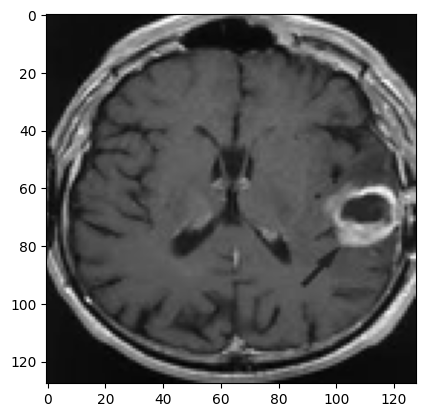

1/1 [==============================] - 0s 226ms/step
Tumor Detected


In [23]:
make_prediction('/content/drive/MyDrive/Data set/archive (1)/images.jpg')